In [1]:
PATH = "C:\\Users\\Tristan\\Desktop\\Computational_Law\\IP_Dashboard\\Data"

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [18, 16]

In [4]:
# Connect and pull everything from the db
con = sqlite3.connect(PATH+"\\patents.db")
df = pd.read_sql_query("SELECT * FROM summary", con)

In [5]:
df.head()

,applicationNum,applicationStatus,filingDate,lodgementDate,titleOfInvention,ipc
0,10201807769Q,Abandoned,2018-09-10,2018-09-10,System to assess and develop skills for profes...,
1,10201807776V,Pending (Published),2015-08-07,2018-09-10,AN ARTICLE OF FURNITURE,None
2,10201807788Q,Pending (Published),2018-09-10,2018-09-10,SYSTEM AND METHOD FOR AUTOMATING USER INTERACT...,None
3,10201807790Y,Patent In Force,2018-09-10,2018-09-10,SEMICONDUCTOR DEVICES,H01L 29/49; H01L 29/423; H01L 29/78
4,10201807792S,Patent In Force,2018-09-10,2018-09-10,IMAGE SENSORS,H01L 27/146


In [6]:
con.close()

In [15]:
df["applicationStatus"].value_counts()

Pending (Published)                       16513
Pending (Not Published)                    2266
Patent In Force                             683
Abandoned                                   615
Refused (Extension of Time Possible)        240
Withdrawn                                   121
Abandoned (Extension of Time Possible)       66
Refused                                      10
Name: applicationStatus, dtype: int64

### Get number of patents filed per day and plot time series

In [8]:
print(df["lodgementDate"].value_counts())

2019-12-13    97
2019-11-29    96
2019-11-26    87
2019-12-04    84
2019-11-28    82
              ..
2020-01-27     1
2020-01-05     1
2019-02-16     1
2019-12-07     1
2018-10-14     1
Name: lodgementDate, Length: 564, dtype: int64


In [29]:
df_dates = df["lodgementDate"].value_counts().rename_axis("lodgementDate").reset_index(name = "counts")

Text(0.5, 1.0, 'Time series of number of patents filed from 10 September 2018 to 1 September 2020')

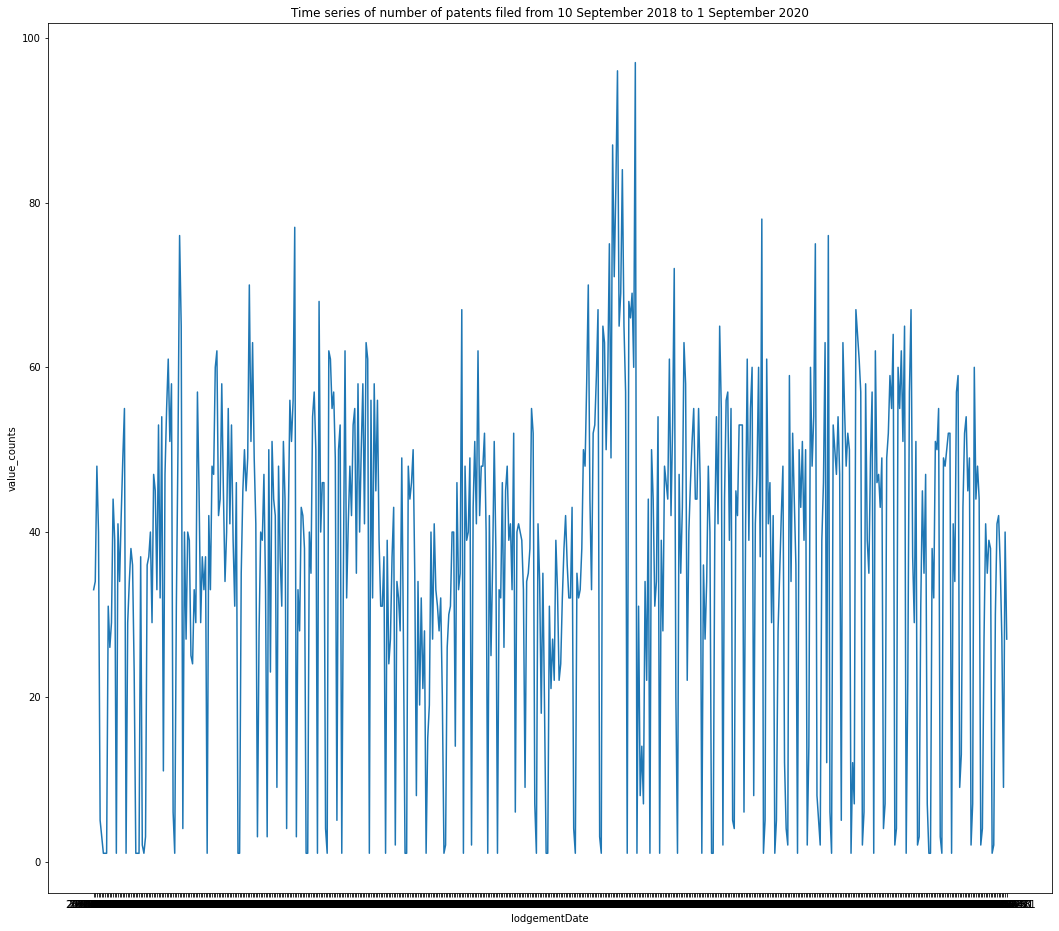

In [13]:
sns.lineplot(x = "lodgementDate", y = "vcounts", data = df_dates)
plt.title("Time series of number of patents filed from 10 September 2018 to 1 September 2020")

## Bar chart of types of patent application status

In [27]:
df_appstatus = df["applicationStatus"].value_counts().rename_axis("applicationStatus").reset_index(name = "counts")

In [28]:
df_appstatus

,applicationStatus,counts
0,Pending (Published),16513
1,Pending (Not Published),2266
2,Patent In Force,683
3,Abandoned,615
4,Refused (Extension of Time Possible),240
5,Withdrawn,121
6,Abandoned (Extension of Time Possible),66
7,Refused,10
